In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network
from random import randint, randrange, sample

In [2]:
data4=pd.read_csv('data/41467_2021_21824_MOESM4_ESM.csv')
data5=pd.read_csv('data/41467_2021_21824_MOESM5_ESM.csv')

In [3]:
data4_BSQ=data4[data4['System']=='BSQ']
data4_EPB=data4[data4['System']=='EPB']
data4_CSM=data4[data4['System']=='CSM']

data5_BSQ=data5[data5['System']=='BSQ']


NameError: name 'graph' is not defined

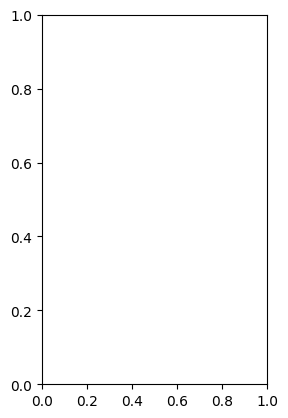

In [4]:
subax1 = plt.subplot(121)
nx.draw(graph, with_labels=True)
# subax2 = plt.subplot(122)
# nx.draw_shell(graph, with_labels=False)

In [11]:
def alone_no(graph,primary):
    a=[]
    for i in (graph.nodes()-primary): #list subtraction
        if len(graph.adj[i])==0:
            a.append(i)
    return len(a)

def alone_list(graph):
    a=[]
    for i in graph.nodes():
        if len(graph.adj[i])==0:
            a.append(i)
    return a

def not_alone_no(graph,primary):
    a=[]
    for i in (graph.nodes()-primary): #list subtraction
        if len(graph.adj[i])!=0:
            a.append(i)
    return len(a)
def is_alone(graph,primary):#add recursion 
    a=[]
    for i in (graph.nodes()-primary): #list subtraction
        if len(graph.adj[i])==0:
            a.append(i)
    return a
#write recursion function that remembers the neighbors before the node is removed

In [15]:
def recursion(graph,graph2,set):
    remove_set=[] #set of nodes that will go extinct
    for a in set: 
        for n in graph2.adj[a]:#loop over list of incoming neighbours
            if len(graph.adj[n])==1: #if the neighbour only feeds on the node we want to remove then add it to the exticnt list
                remove_set.append(n)    
        if len(remove_set)!=0: #repeat the process through the nodes we will remove to check if others are also affected
            remove_set.append(recursion(graph,graph2,remove_set))
        graph.remove_node(a)
    return remove_set

In [34]:
#obtain two graphs with complementary deffinitions of edges

graph=nx.DiGraph()
for n in data4_BSQ['SpeciesID']:
    graph.add_node(n)
for n in range(len(data5_BSQ['ResourceSpeciesID'])):
    graph.add_edge(data5_BSQ['ConsumerSpeciesID'][n],data5_BSQ['ResourceSpeciesID'][n])
    

graph_inverted=nx.DiGraph()
for n in data4_BSQ['SpeciesID']:
    graph_inverted.add_node(n)
for n in range(len(data5_BSQ['ResourceSpeciesID'])):
    graph_inverted.add_edge(data5_BSQ['ResourceSpeciesID'][n],data5_BSQ['ConsumerSpeciesID'][n])
        
   


In [35]:
to_remove=sample(data4_BSQ['SpeciesID'].tolist(),len(data4_BSQ))    
alone_no=[]
primary=alone_list(graph)
original_nodes=set(graph.nodes())
for elem in (set(to_remove)-(original_nodes-set(graph.nodes()))):
    if elem in graph.nodes():
        graph.remove_node(elem)
        graph_inverted.remove_node(elem)
        set1=is_alone(graph,primary)
        graph.remove_nodes_from(list(filter(None,recursion(graph,graph_inverted,set1))))
        graph_inverted.remove_nodes_from(list(filter(None,recursion(graph,graph_inverted,set1))))
        alone_no.append(not_alone_no(graph,primary))

plt.plot(alone_no)

NetworkXError: The node 21 is not in the digraph.

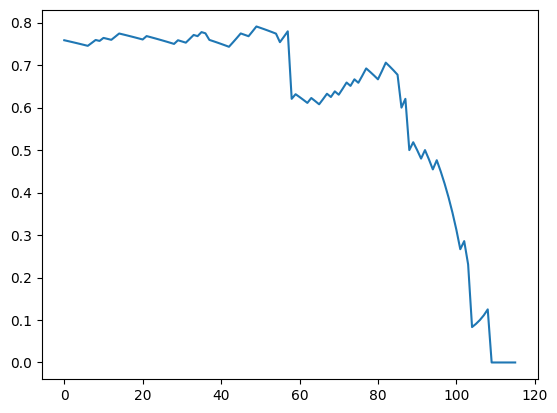

In [ ]:
#obtaining number of species that are not extinct (y), by total number of ar

graph=nx.DiGraph()
for n in data4_BSQ['SpeciesID']:
    graph.add_node(n)
for n in range(len(data5_BSQ['ResourceSpeciesID'])):
    graph.add_edge(data5_BSQ['ConsumerSpeciesID'][n],data5_BSQ['ResourceSpeciesID'][n])

to_remove=sample(data4_BSQ['SpeciesID'].tolist(),len(data4_BSQ))        


    
not_alone_prop=[]
primary=alone_list(graph)
for elem in to_remove:
    graph.remove_node(elem)
    not_alone_prop.append(not_alone_no(graph,primary)/(len(graph.nodes())+1))
    


plt.plot(not_alone_prop)

In [ ]:
def recursion2(graph,set): #for few simple, specific undirected simplifications of directed graphs
    remove_set=[]#set of nodes that will go extinct
    for a in set:
        neigh=graph.adj[a]
        for n in neigh:
            if len(graph.adj[n])==1: #if the neighbor is only connected to the node we want to remove then add it to the exticnt list
                remove_set.append(n)    
        if len(remove_set)!=0: #repeat the process through the nodes we will remove to check if others are also affected
            remove_set.append(recursion2(graph,remove_set))
    return remove_set

In [ ]:
graph2=nx.DiGraph()
graph2.add_nodes_from([1,2,3,4,5])
graph2.add_edges_from([[2,1],[3,1],[4,1],[4,5]])

NameError: name 'nx' is not defined

In [ ]:
to_remove=sample(data4_BSQ['SpeciesID'].tolist(),len(data4_BSQ))            
   
alone=[]
primary=alone_list(graph)
for elem in to_remove:
    if elem in graph.nodes():
        graph.remove_node(elem)
        alone.append(not_alone_no(graph,primary))
        graph.remove_nodes_from(is_alone(graph))

In [ ]:
graph.adj[209]
#graph_inverted.adj[209]

AtlasView({24: {}, 25: {}, 26: {}, 29: {}, 34: {}, 35: {}, 36: {}, 37: {}, 38: {}, 39: {}, 40: {}, 41: {}, 42: {}, 43: {}, 45: {}, 53: {}, 66: {}, 77: {}, 79: {}, 88: {}, 89: {}, 91: {}, 96: {}, 97: {}, 98: {}, 101: {}, 103: {}, 105: {}, 107: {}, 108: {}, 109: {}, 86: {}, 90: {}, 94: {}, 111: {}, 114: {}, 119: {}, 136: {}, 138: {}, 211: {}})

In [ ]:
list(graph.nodes())

[4,
 6,
 7,
 8,
 10,
 11,
 12,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 24,
 25,
 26,
 29,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 45,
 47,
 48,
 53,
 54,
 66,
 75,
 76,
 77,
 79,
 82,
 86,
 88,
 89,
 90,
 91,
 92,
 94,
 96,
 97,
 98,
 100,
 101,
 103,
 104,
 105,
 107,
 108,
 109,
 110,
 111,
 114,
 118,
 119,
 121,
 122,
 125,
 128,
 130,
 131,
 134,
 136,
 137,
 138,
 140,
 145,
 146,
 147,
 148,
 152,
 153,
 156,
 157,
 158,
 160,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 171,
 172,
 175,
 176,
 178,
 179,
 181,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 196,
 198,
 203,
 206,
 207,
 208,
 209,
 211]

In [8]:
set(graph_inverted.nodes())-set(graph.nodes())

set()